 Given the complete **MNIST dataset** (can be found in "sample_data" of Google Colab).

 Work with your team to find the most suitable architecture
of the neural network.

 **Note**: the performance of each model
should be evaluated on the test set and the test set must not be used during the training process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
df_train = pd.read_csv('mnist_train_small.csv', header=None)

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df_train.iloc[:,0].to_numpy()
X = df_train.iloc[:, 1:].to_numpy().T

In [5]:
y = to_categorical(y)
y = y.T

In [6]:
y.shape

(10, 20000)

In [7]:
print(f'Shape of X = {X.shape}')
print(f'Shape of y = {y.shape}')

Shape of X = (784, 20000)
Shape of y = (10, 20000)


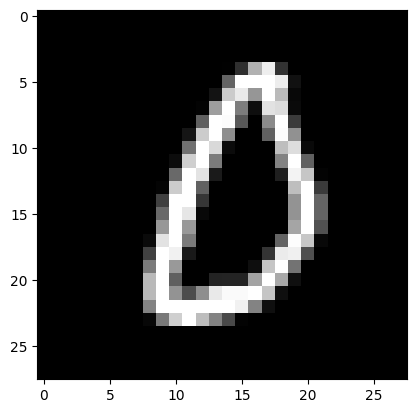

In [8]:
import random

idx = random.randrange(0, X.shape[0])
plt.imshow(X[:, idx].reshape(28,28), cmap = 'gray')
plt.show()

![SVG Image](nn.svg)

## Some Functions

In [9]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exps / np.sum(exps, axis=0, keepdims=True)

def derivative_relu(x):
    return np.array(x > 0, dtype=np.float32)

## Step 1 : Initialize Parameters

n_x : Number of neurons in Input Layer

n_h : Number of neurons in Hidden Layer

n_y : Number of neurons in Output Layer

In [10]:
def init_param(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    return w1, b1, w2, b2

# Step 2 : Forward Propagation

$Z^{[1]} = W^{[1]} \cdot X + b^{[1]}$

$a^{[1]} = ReLU(Z^{[1]})$

$Z^{[2]} = W^{[2]} \cdot X + b^{[2]}$

$a^{[2]} = Softmax(Z^{[2]})$

In [11]:
def forward_prop(x, w1, b1, w2, b2):
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    return z1, a1, z2, a2

# Cost Function

$cost = - \frac{1}{m} [ \sum\limits_{i=1}^m \sum\limits_{k=1}^K y_k^{(i)}\log(h(x^{(i)}))_k + (1 - y_k^{(i)})\log(1 - h(x_{(i)}))_k)]$ 

In [12]:
def cost_func(a2, y):
  m = y.shape[1]
  cost = -(1/m) * np.sum(y * np.log(a2) - (1 - y)*np.log(1 - a2))  
  return cost

# Step 3 : Backward Propagation

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$

$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$



In [13]:
def backward_prop(x, y, w1, b1, w2, b2, z1, a1, z2, a2):
    m = x.shape[1]

    dz2 = a2 - y
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * derivative_relu(z1)
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2

# Step 4 : Update Parameters

$ W_1 = W_1 -  lr * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  lr * \frac{\partial Cost }{\partial B_1}$ 

$ W_2 = W_2 -  lr * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  lr * \frac{\partial Cost }{\partial B_2}$ 

In [14]:
def update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
    
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2

    return w1, b1, w2, b2

# Step 5 : Training

In [15]:
X = X/255

In [16]:
n_x, m = X.shape
n_y = y.shape[0]
n_h = 10
lr = 0.1

cost_list = []
w1, b1, w2, b2 = init_param(n_x, n_h, n_y)

for i in range(1000):
    z1, a1, z2, a2 = forward_prop(X, w1, b1, w2, b2)

    cost = cost_func(a2, y)

    dw1, db1, dw2, db2 = backward_prop(X, y, w1, b1, w2, b2, z1, a1, z2, a2)

    w1, b1, w2, b2 = update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)

    cost_list.append(cost)

    if i % 100 == 0:
        print(f'After {i} iterations, cost : {cost}')

After 0 iterations, cost : 1.35433860103041
After 100 iterations, cost : 0.9153447519789296
After 200 iterations, cost : 0.22322281384516038
After 300 iterations, cost : 0.15064704288296416
After 400 iterations, cost : 0.12973582747704476
After 500 iterations, cost : 0.11934572880669735
After 600 iterations, cost : 0.11284515952676241
After 700 iterations, cost : 0.10825537185720646
After 800 iterations, cost : 0.10465670151654666
After 900 iterations, cost : 0.10164924205230659


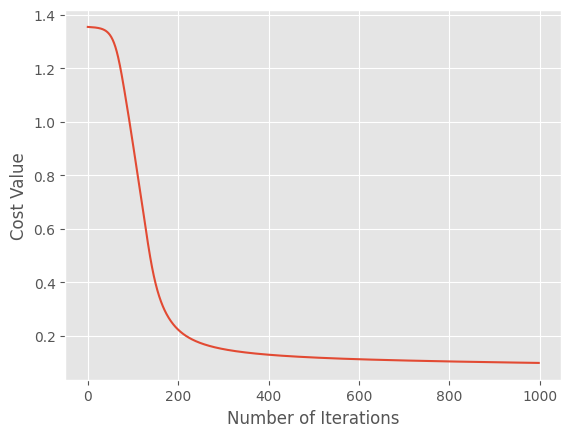

In [17]:
plt.style.use('ggplot')

plt.plot(range(i), cost_list[:-1])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Value')
plt.show()

## Model Evaluation

In [18]:
df_test = pd.read_csv('mnist_test.csv')

In [19]:
X_test = df_test.iloc[:, 1:].to_numpy().T
y_test = df_test.iloc[:, 0].to_numpy()

In [20]:
y_test = to_categorical(y_test)
y_test = y_test.T

In [21]:
X_test = X_test/255

In [22]:
def predict(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(x, w1, b1, w2, b2)
    predictions = np.argmax(a2, axis=0)
    return predictions

def accuracy(predictions, true_labels):
    correct = np.sum(predictions == true_labels)
    total = true_labels.shape[0]
    accuracy = correct / total
    return accuracy

In [23]:
predictions = predict(X_test, w1, b1, w2, b2)
true_labels = np.argmax(y_test, axis=0)

acc = accuracy(predictions, true_labels)
print(f'Accuracy : {acc * 100:.2f} %')

Accuracy : 90.44 %


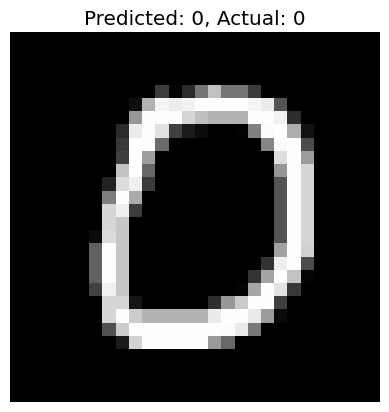

In [24]:
index = 9  # Index of the image to predict
test_image = X_test[:, index]
test_label = np.argmax(y_test[:, index])  # Get the actual label

# Predict the label for the test image
_, _, _, a2 = forward_prop(test_image.reshape((-1, 1)), w1, b1, w2, b2)
predicted_label = np.argmax(a2)  # Get the index of the maximum value

# Reshape the image back to its original shape for plotting
test_image = test_image.reshape((28, 28))

# Display the image
plt.imshow(test_image, cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {test_label}")
plt.axis('off')
plt.show()

# Other Architecture

In [25]:
n_x, m = X.shape
n_y = y.shape[0]
n_h = 15
lr = 0.1

cost_list = []
w1, b1, w2, b2 = init_param(n_x, n_h, n_y)

for i in range(1000):
    z1, a1, z2, a2 = forward_prop(X, w1, b1, w2, b2)

    cost = cost_func(a2, y)

    dw1, db1, dw2, db2 = backward_prop(X, y, w1, b1, w2, b2, z1, a1, z2, a2)

    w1, b1, w2, b2 = update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)

    cost_list.append(cost)

    if i % 500 == 0:
        print(f'After {i} iterations, cost : {cost}')

After 0 iterations, cost : 1.3542301472269302
After 500 iterations, cost : 0.11222823018530831


In [26]:
predictions = predict(X_test, w1, b1, w2, b2)
true_labels = np.argmax(y_test, axis=0)

acc = accuracy(predictions, true_labels)
print(f'Accuracy : {acc * 100:.2f} %')

Accuracy : 91.19 %


1st Architecture : 1 hidden layer with 10 nodes, Accuracy = 90.44 %

2nd Architecture : 1 hidden layer with 15 nodes, Accuracy = 91.19 %